In [27]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
import time
from keras.datasets import cifar10
from keras.callbacks import History
import matplotlib.pyplot as plt


# MLP

In [12]:
#MLP with preprocessing  LATEST

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

#Randomly sample 20% of the training set and use that as your new training set for the purposes of this problem.
X_train, _, y_train, _=train_test_split(X, y, train_size=10000, random_state=42, shuffle=True)
classes = np.unique(y_train) #number of classes
#one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#convert from integers to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize a list of sample image data in the range of 0 to 1
X_train /= 255
X_test /= 255

# preprocessing steps taken 


X_train_mean = np.mean(X_train, axis=(0,1,2))
X_train_std = np.std(X_train, axis=(0,1,2))
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std #40

#MLP model
mlp_model=Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='sigmoid')) #Fully connected layer with 512 units and a sigmoid activation function
mlp_model.add(Dense(512,activation='sigmoid'))  #Fully connected layer with 512 units and a sigmoid activation function
mlp_model.add(Dense(10,activation='softmax')) #Output layer with the suitable activation function and number of neurons for the classification task
mlp_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history=mlp_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=100)
score=mlp_model.evaluate(X_test,y_test)

score

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 4s 362us/step - loss: 1.9092 - accuracy: 0.3235 - val_loss: 1.7543 - val_accuracy: 0.3880
Epoch 2/100
10000/10000 [==============================] - 3s 284us/step - loss: 1.7038 - accuracy: 0.4052 - val_loss: 1.7301 - val_accuracy: 0.3822
Epoch 3/100
10000/10000 [==============================] - 3s 313us/step - loss: 1.6058 - accuracy: 0.4380 - val_loss: 1.6598 - val_accuracy: 0.4229
Epoch 4/100
10000/10000 [==============================] - 3s 286us/step - loss: 1.4912 - accuracy: 0.4827 - val_loss: 1.6168 - val_accuracy: 0.4378
Epoch 5/100
10000/10000 [==============================] - 3s 294us/step - loss: 1.4071 - accuracy: 0.5093 - val_loss: 1.5799 - val_accuracy: 0.4540
Epoch 6/100
10000/10000 [==============================] - 3s 286us/step - loss: 1.3038 - accuracy: 0.5495 - val_loss: 1.6034 - val_accuracy: 0.4557
Epoch 7/100
10000/10000 [==============================]

10000/10000 [==============================] - 3s 318us/step - loss: 0.0764 - accuracy: 0.9775 - val_loss: 3.1136 - val_accuracy: 0.4882
Epoch 56/100
10000/10000 [==============================] - 3s 310us/step - loss: 0.0906 - accuracy: 0.9731 - val_loss: 3.2974 - val_accuracy: 0.4745
Epoch 57/100
10000/10000 [==============================] - 3s 320us/step - loss: 0.1175 - accuracy: 0.9599 - val_loss: 3.3282 - val_accuracy: 0.4745
Epoch 58/100
10000/10000 [==============================] - 3s 319us/step - loss: 0.1794 - accuracy: 0.9406 - val_loss: 3.2662 - val_accuracy: 0.4712
Epoch 59/100
10000/10000 [==============================] - 3s 323us/step - loss: 0.1728 - accuracy: 0.9411 - val_loss: 3.1961 - val_accuracy: 0.4736
Epoch 60/100
10000/10000 [==============================] - 3s 313us/step - loss: 0.1169 - accuracy: 0.9619 - val_loss: 3.2384 - val_accuracy: 0.4761
Epoch 61/100
10000/10000 [==============================] - 3s 317us/step - loss: 0.1003 - accuracy: 0.9679 - val

[3.7059127811431885, 0.4812000095844269]

In [13]:
print('Testing data')
print('\n', 'Test accuracy:', score[1]*100)
print('Loss: {:.4f}'.format(score[0]))

Testing data

 Test accuracy: 48.12000095844269
Loss: 3.7059


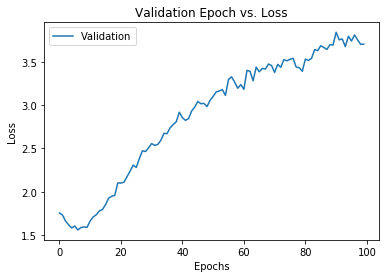

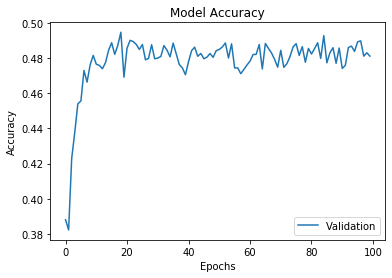

In [14]:
from keras.callbacks import History
import matplotlib.pyplot as plt
#  Visualize loss history / model loss
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Validation Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation'])
plt.show()
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation'])
plt.show()


Training data

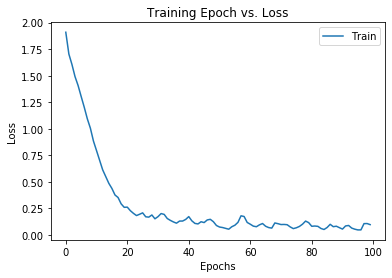

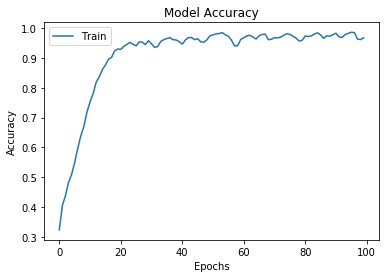

In [15]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Training Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train'])
plt.show()

# CNN1

In [28]:
#CNN1 with preprocessing latest

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

#Randomly sample 20% of the training set and use that as your new training set for the purposes of this problem.
X_train, _, y_train, _=train_test_split(X, y, train_size=10000, random_state=42, shuffle=True)
classes = np.unique(y_train) #number of classes

#one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#convert from integers to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize a list of sample image data in the range of 0 to 1
X_train /= 255
X_test /= 255

# preprocessing steps taken
X_train_mean = np.mean(X_train, axis=(0,1,2))
X_train_std = np.std(X_train, axis=(0,1,2))
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std 

#CNN model
model = Sequential()
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(Flatten())
#Fully connected (Dense) layer with 512 units and a sigmoid activation function
model.add(Dense(512, activation='sigmoid'))
#Fully connected layer with 512 units and a sigmoid activation function
model.add(Dense(512, activation='sigmoid'))

#Output layer with the suitable activation function and number of neurons for the classification task

model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam",
              loss=categorical_crossentropy,
              metrics=['accuracy'])



checkpointer = ModelCheckpoint(filepath="cifar10.model.cnn.hdf5", verbose = 1,save_best_only = True)
import time
start_time = time.time()
history=model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),callbacks=[checkpointer])

loss, accuracy = model.evaluate(X_test, y_test)
print('loss: ', loss, '\naccuracy: ', accuracy)
endtrain = time.time()
print('Time taken for training is ',(endtrain-start_time))

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 138s 14ms/step - loss: 1.6625 - accuracy: 0.3956 - val_loss: 1.4165 - val_accuracy: 0.4820

Epoch 00001: val_loss improved from inf to 1.41648, saving model to cifar10.model.cnn.hdf5
Epoch 2/100
10000/10000 [==============================] - 126s 13ms/step - loss: 1.1380 - accuracy: 0.5859 - val_loss: 1.1520 - val_accuracy: 0.5951

Epoch 00002: val_loss improved from 1.41648 to 1.15197, saving model to cifar10.model.cnn.hdf5
Epoch 3/100
10000/10000 [==============================] - 123s 12ms/step - loss: 0.6133 - accuracy: 0.7947 - val_loss: 1.1532 - val_accuracy: 0.6282

Epoch 00003: val_loss did not improve from 1.15197
Epoch 4/100
10000/10000 [==============================] - 123s 12ms/step - loss: 0.1691 - accuracy: 0.9574 - val_loss: 1.3063 - val_accuracy: 0.6423

Epoch 00004: val_loss did not improve from 1.15197
Epoch 5/100
10000/10000 [==============================] -

10000/10000 [==============================] - 158s 16ms/step - loss: 3.1934e-06 - accuracy: 1.0000 - val_loss: 2.0961 - val_accuracy: 0.6492

Epoch 00040: val_loss did not improve from 1.15197
Epoch 41/100
10000/10000 [==============================] - 147s 15ms/step - loss: 2.7534e-06 - accuracy: 1.0000 - val_loss: 2.1157 - val_accuracy: 0.6488

Epoch 00041: val_loss did not improve from 1.15197
Epoch 42/100
10000/10000 [==============================] - 147s 15ms/step - loss: 2.3713e-06 - accuracy: 1.0000 - val_loss: 2.1317 - val_accuracy: 0.6497

Epoch 00042: val_loss did not improve from 1.15197
Epoch 43/100
10000/10000 [==============================] - 147s 15ms/step - loss: 2.0461e-06 - accuracy: 1.0000 - val_loss: 2.1482 - val_accuracy: 0.6489

Epoch 00043: val_loss did not improve from 1.15197
Epoch 44/100
10000/10000 [==============================] - 148s 15ms/step - loss: 1.7637e-06 - accuracy: 1.0000 - val_loss: 2.1667 - val_accuracy: 0.6490

Epoch 00044: val_loss did not


Epoch 00079: val_loss did not improve from 1.15197
Epoch 80/100
10000/10000 [==============================] - 126s 13ms/step - loss: 1.0455e-08 - accuracy: 1.0000 - val_loss: 2.6947 - val_accuracy: 0.6436

Epoch 00080: val_loss did not improve from 1.15197
Epoch 81/100
10000/10000 [==============================] - 125s 12ms/step - loss: 9.5010e-09 - accuracy: 1.0000 - val_loss: 2.7036 - val_accuracy: 0.6432

Epoch 00081: val_loss did not improve from 1.15197
Epoch 82/100
10000/10000 [==============================] - 128s 13ms/step - loss: 8.7738e-09 - accuracy: 1.0000 - val_loss: 2.7118 - val_accuracy: 0.6428

Epoch 00082: val_loss did not improve from 1.15197
Epoch 83/100
10000/10000 [==============================] - 129s 13ms/step - loss: 8.0466e-09 - accuracy: 1.0000 - val_loss: 2.7192 - val_accuracy: 0.6425

Epoch 00083: val_loss did not improve from 1.15197
Epoch 84/100
10000/10000 [==============================] - 123s 12ms/step - loss: 7.4029e-09 - accuracy: 1.0000 - val_l

Validation curves

In [29]:
print('Loss:',loss)
print('Accuracy of validation test: ',(accuracy*100))

Loss: 2.8114370235443116
Accuracy of validation test:  64.19000029563904


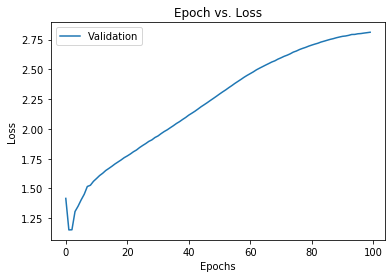

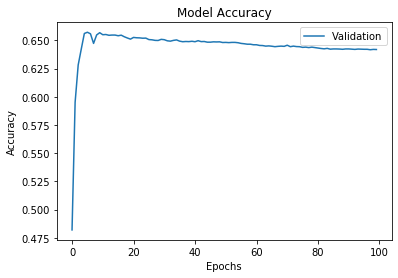

In [30]:
from keras.callbacks import History
import matplotlib.pyplot as plt
#  Visualize loss history / model loss
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation'])
plt.show()
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation'])
plt.show()

Training curves

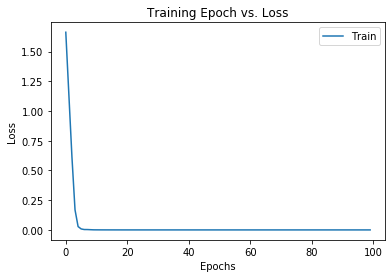

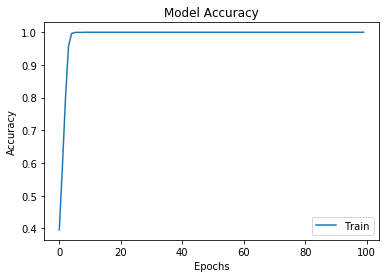

In [31]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Training Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train'])
plt.show()

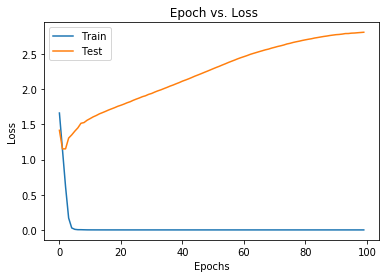

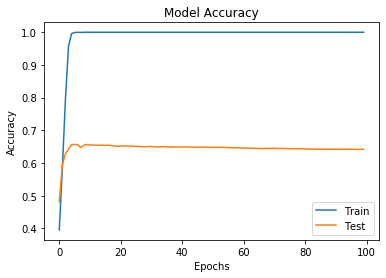

In [32]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(" Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# CNN2

In [33]:
#CNN2 with preprocessing



from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

#Randomly sample 20% of the training set and use that as your new training set for the purposes of this problem.
X_train, _, y_train, _=train_test_split(X, y, train_size=10000, random_state=42, shuffle=True)
classes = np.unique(y_train) #number of classes

#one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#convert from integers to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize a list of sample image data in the range of 0 to 1
X_train /= 255
X_test /= 255

# preprocessing
X_train_mean = np.mean(X_train, axis=(0,1,2))
X_train_std = np.std(X_train, axis=(0,1,2))
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std 


start_time = time.time()

#CNN2 model
cnn2=Sequential()

#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
cnn2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
#2x2 Max pooling layer
cnn2.add(MaxPooling2D(pool_size=2))
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
cnn2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
#2x2 Max pooling layer
cnn2.add(MaxPooling2D(pool_size=2))
cnn2.add(Flatten())
#Fully connected layer with 512 units and a sigmoid activation function
cnn2.add(Dense(units=512,activation='sigmoid'))
#Dropout layer with 0.2 dropout rate
cnn2.add(Dropout(0.2))
#Fully connected layer with 512 units and a sigmoid activation function
cnn2.add(Dense(units=512,activation='sigmoid'))
#Dropout layer with 0.2 dropout rate
cnn2.add(Dropout(0.2))
#Output layer with the suitable activation function and number of neurons for the classification task
cnn2.add(Dense(activation='softmax',units=10))
cnn2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn2.summary()
checkpointer = ModelCheckpoint(filepath="cifar10.model.cnn2.hdf5", verbose = 1,save_best_only = True)

history=cnn2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100,callbacks=[checkpointer])
score = cnn2.evaluate(X_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)             


Epoch 00031: val_loss did not improve from 1.01930
Epoch 32/100
10000/10000 [==============================] - 23s 2ms/step - loss: 0.0440 - accuracy: 0.9842 - val_loss: 2.0050 - val_accuracy: 0.6710

Epoch 00032: val_loss did not improve from 1.01930
Epoch 33/100
10000/10000 [==============================] - 22s 2ms/step - loss: 0.0412 - accuracy: 0.9862 - val_loss: 2.1108 - val_accuracy: 0.6647

Epoch 00033: val_loss did not improve from 1.01930
Epoch 34/100
10000/10000 [==============================] - 22s 2ms/step - loss: 0.0373 - accuracy: 0.9865 - val_loss: 2.1498 - val_accuracy: 0.6735

Epoch 00034: val_loss did not improve from 1.01930
Epoch 35/100
10000/10000 [==============================] - 22s 2ms/step - loss: 0.0417 - accuracy: 0.9843 - val_loss: 2.0695 - val_accuracy: 0.6733

Epoch 00035: val_loss did not improve from 1.01930
Epoch 36/100
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 2.1699 - val_accuracy: 0.

10000/10000 [==============================] - 30s 3ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 2.5084 - val_accuracy: 0.6719

Epoch 00072: val_loss did not improve from 1.01930
Epoch 73/100
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0310 - accuracy: 0.9888 - val_loss: 2.4320 - val_accuracy: 0.6645

Epoch 00073: val_loss did not improve from 1.01930
Epoch 74/100
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 2.2852 - val_accuracy: 0.6787

Epoch 00074: val_loss did not improve from 1.01930
Epoch 75/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 2.4501 - val_accuracy: 0.6708

Epoch 00075: val_loss did not improve from 1.01930
Epoch 76/100
10000/10000 [==============================] - 29s 3ms/step - loss: 0.0173 - accuracy: 0.9928 - val_loss: 2.4957 - val_accuracy: 0.6691

Epoch 00076: val_loss did not improve from 1.01930
Epoch 77

In [34]:
print('Time taken for CNN2 is',time.time()-start_time)

Time taken for CNN2 is 3474.5622947216034


Validation

In [35]:
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy of validation test: {:.4f}'.format(score[1]))

Loss: 2.6237
Accuracy of validation test: 0.6652


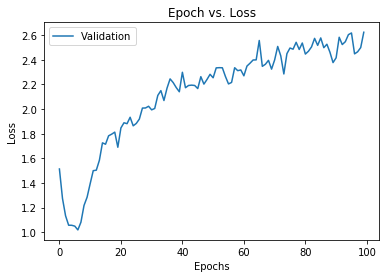

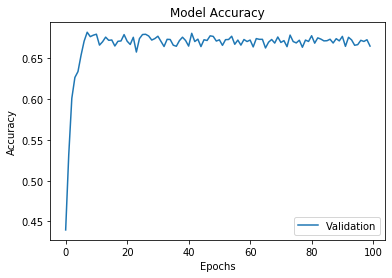

In [36]:
from keras.callbacks import History
import matplotlib.pyplot as plt
#  Visualize loss history / model loss
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation'])
plt.show()
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation'])
plt.show()

Training

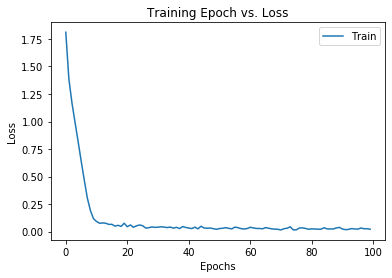

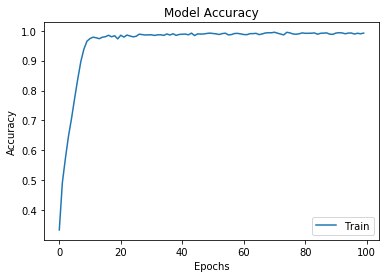

In [37]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Training Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train'])
plt.show()

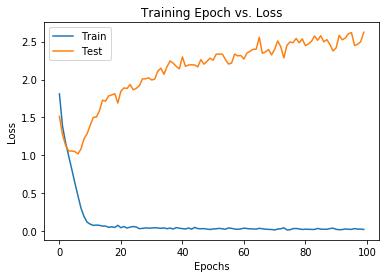

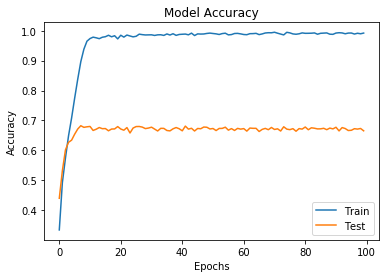

In [38]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()